In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/stopwords/stopwords
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv
/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/winemask/wine_mask.png


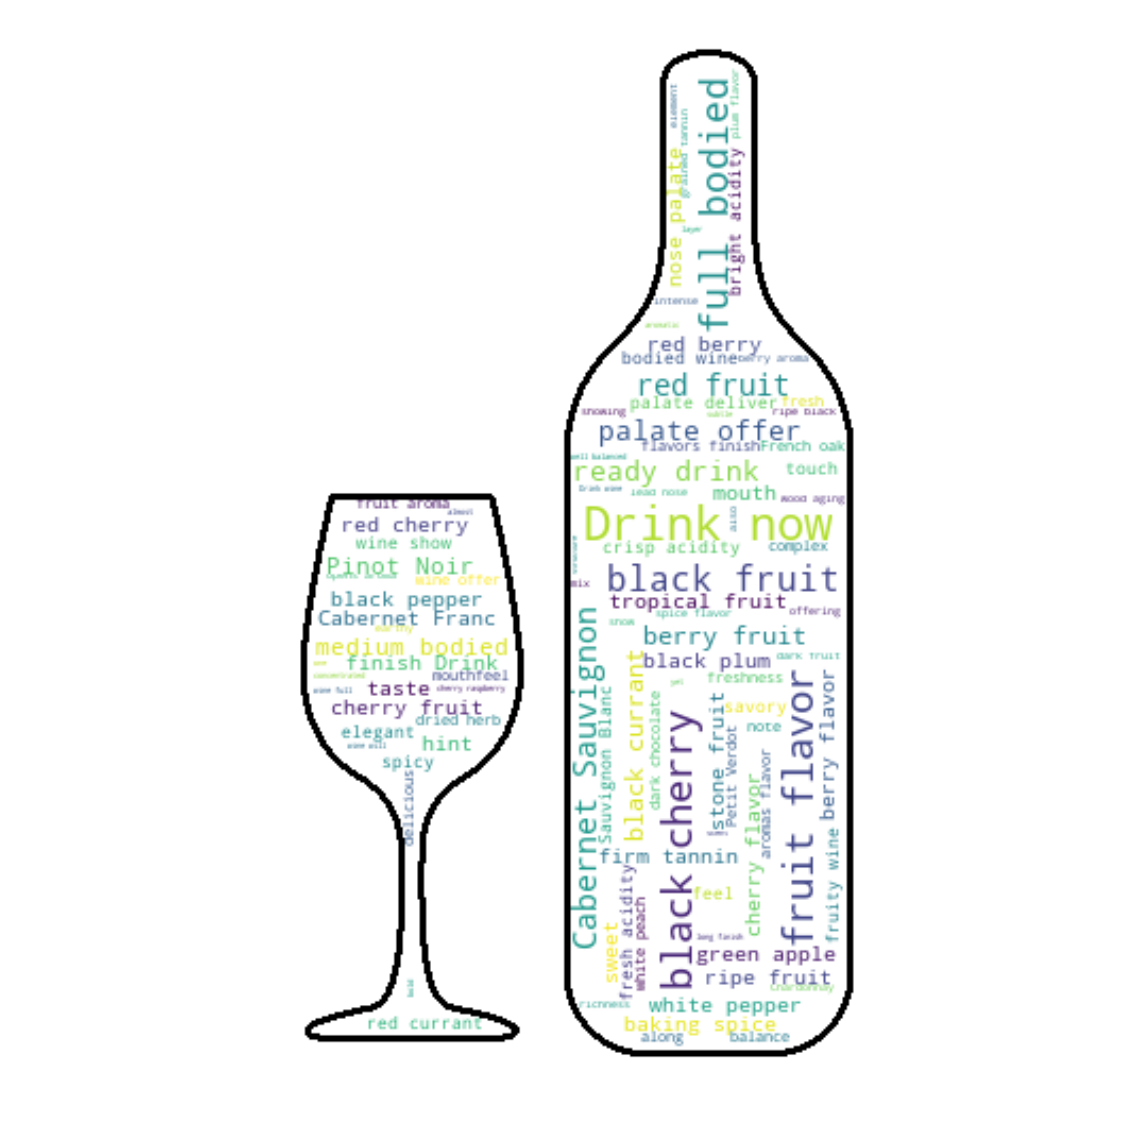

In [69]:
    #-----reading in the wine dataset and joining all the reviews together-----#
data = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
text = " ".join(review for review in data.description)

    #-----reading in the stopword dataset and assigning to newlist-----#
newlist=[]
with open("/kaggle/input/stopwords/stopwords", "r") as file:
        stopwordlist = [file.read()]
for word in stopwordlist:
        newlist.extend(word.split('\n'))

    #-----reading in the mask image into an np array and transforming the whitespace to black, thus setting up the wordcloud "boundries"-----#
wine_mask = np.array(Image.open("/kaggle/input/winemask/wine_mask.png"))
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)
transformed_wine_mask[wine_mask == 0] = 255

    #-----creating the word cloud object-----#
wordcloud = WordCloud(stopwords=newlist,max_words=100,background_color='white', mask=transformed_wine_mask, contour_width=3).generate(text)

    #-----printing the word cloud object-----#
plt.figure(figsize=[30,20])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


